In [2]:
# importing basic library's

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# reading data

cc=pd.read_csv('../input/vehicle-dataset-from-cardekho/Car details v3.csv')
cc

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# checking for null values

cc.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

There are max 222 null values which is minor compare to 8000+ records

In [6]:
# Droping null values coz its minor count

cc.dropna(inplace=True)
cc.shape

(7906, 13)

In [7]:
# Same will check for duplicate values

cc.duplicated().sum()

1189

**There are 1189 duplicate values,which is too than 8000 records, So first we need to check it properly**

In [8]:
cc[cc.duplicated(subset=['name','year','selling_price','km_driven','fuel','seller_type','transmission','owner','seats'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**There are different cars with duplicate values we will check 2-3 car name wise and km_driven or selling price
Talking two columns because their will be possibilty having same car name with different km_driven**

In [9]:
# first we will start with 'Hyundai Grand i10 Sportz' and its km_driven

cc[(cc['name']=='Hyundai Grand i10 Sportz')&(cc['km_driven']==35000)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
290,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0


In [10]:
# Now will check how many duplicates of 'Jaguar XE 2016-2019 2.0L Diesel Prestige' with km_driven

cc[(cc['name']=='Jaguar XE 2016-2019 2.0L Diesel Prestige')&(cc['km_driven']==9000)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
151,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
409,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
646,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
1077,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
1096,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
1115,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
1134,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
1709,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
2630,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


In [11]:
# Too many records, w'll check only index no.

print('Jaguar XE : ',cc[(cc['name']=='Jaguar XE 2016-2019 2.0L Diesel Prestige')&(cc['km_driven']==9000)].index)
print('Lexus ES : ',cc[(cc['name']=='Lexus ES 300h')&(cc['km_driven']==20000)].index)

Jaguar XE :  Index([ 151,  370,  409,  646, 1077, 1096, 1115, 1134, 1709, 2630, 2663, 3078,
       3408, 3516, 3831, 4215, 4234, 4255, 4320, 4414, 4782, 4815, 5083, 5614,
       6166, 6554, 6573, 6689, 6959, 7858],
      dtype='int64')
Lexus ES :  Index([ 132,  371,  410,  647, 1078, 1097, 1116, 1135, 1562, 1710, 1858, 2631,
       2664, 3079, 3237, 3409, 3517, 3832, 4216, 4235, 4256, 4321, 4415, 4816,
       5084, 5246, 5615, 6167, 6555, 6574, 6690, 6960, 7701, 7859],
      dtype='int64')


**Too many duplicates are there of single record and totaly same, So it will be better we drop all the duplicates at one time**

In [12]:
# Dropped the Duplicates

cc.drop_duplicates(inplace=True)
cc.shape

(6717, 13)

**Now the data proper, removed null & duplicate values**

In [13]:
cc.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# **Statistical Visualization**

**Now lets visualize the data for proper insights**

In [14]:
# to see values and its count of column

cc['fuel'].value_counts()

fuel
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: count, dtype: int64

In [15]:
cc['year'].value_counts()

year
2017    802
2016    691
2015    680
2018    607
2014    580
2012    576
2013    560
2011    535
2010    361
2019    347
2009    225
2008    192
2007    166
2006    102
2005     70
2020     63
2004     49
2003     36
2002     19
2000     14
1999     13
1998      9
1997      9
2001      6
1994      2
1996      2
1995      1
Name: count, dtype: int64

In [16]:
cc['owner'].value_counts()

owner
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

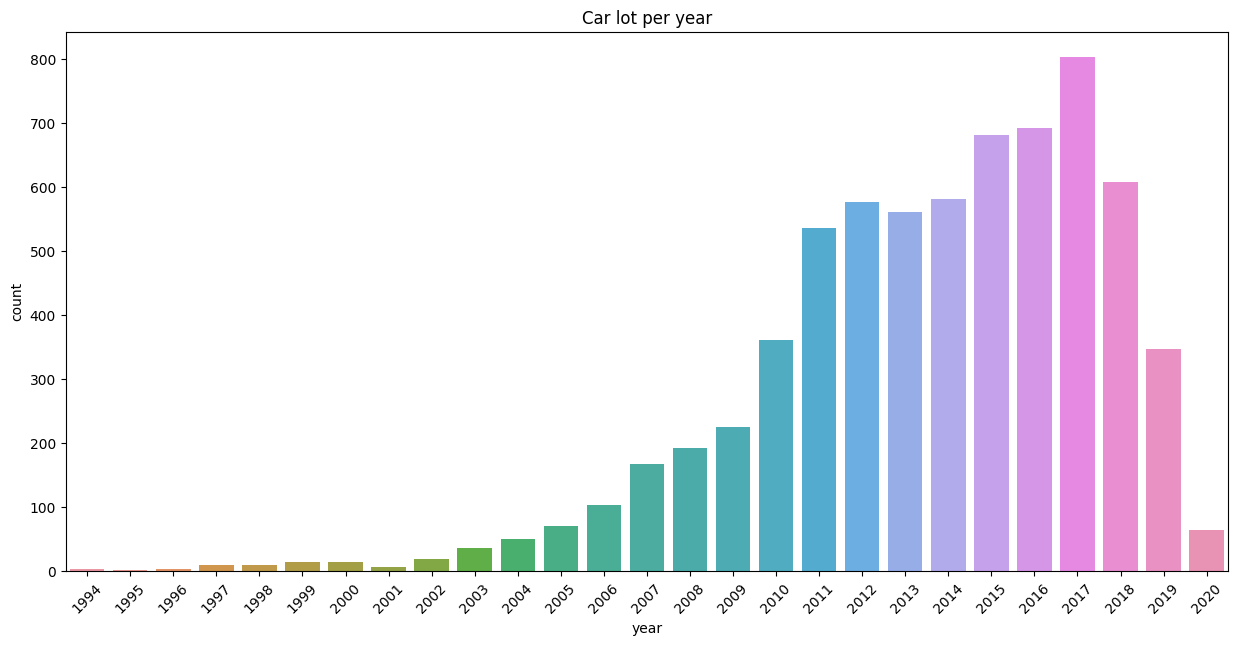

In [17]:
# plotting the barchart for cars lot in every year

plt.figure(figsize=(15,7))
sn.countplot(data=cc,x=cc['year'])
plt.title('Car lot per year')
plt.xticks(rotation=45)
plt.show()

In [18]:
# To see all column names

cc.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

fuel


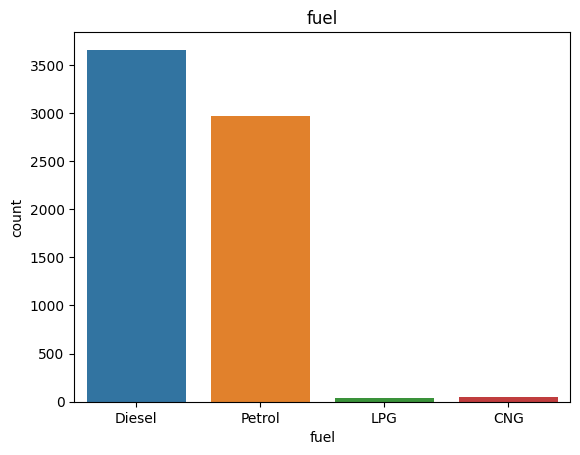

seller_type


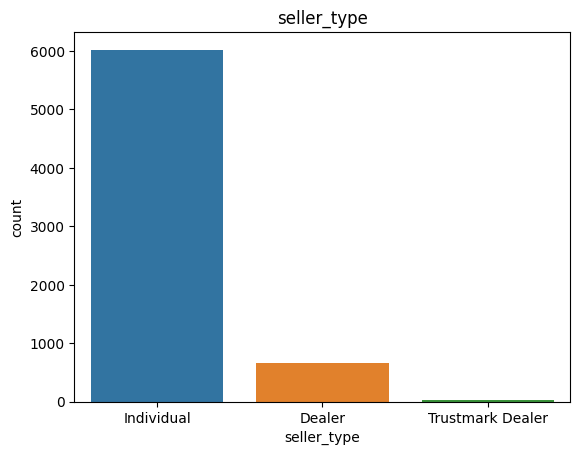

transmission


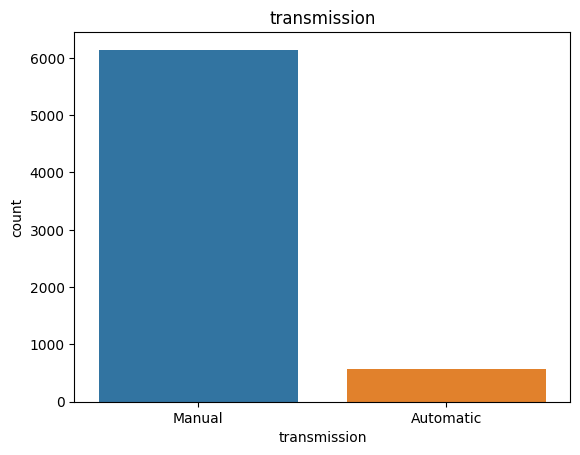

owner


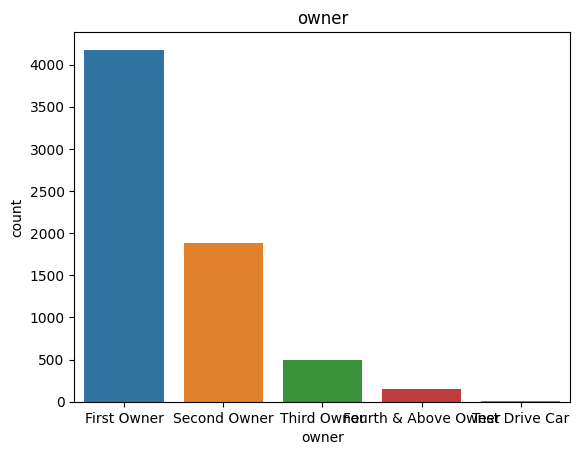

seats


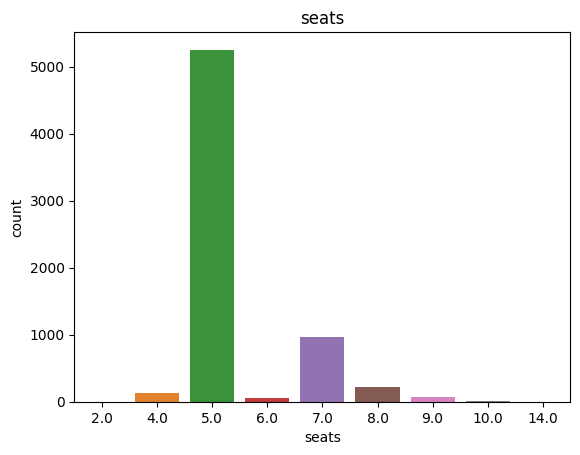

In [19]:
# we will take required column for plotting
count = cc[['fuel','seller_type','transmission','owner','seats']]

for col in count:
    print(col)
    sn.countplot(data=count,x=count[col])
    plt.title(f'{col}')
    plt.show()

In [20]:
# wait ...which car is with 10 seater

cc[(cc['seats']==10.0)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
604,Tata Sumo CX 10 Str BSIV,2011,175000,20000,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,"115@ 2,500(kgm@ rpm)",10.0
795,Chevrolet Tavera Neo 3 LS 10 Str,2016,409999,60000,Diesel,Individual,Manual,Second Owner,12.2 kmpl,1994 CC,105.3 bhp,263.7Nm@ 2500rpm,10.0
2086,Tata Sumo EX 10/7 Str BSIII,2012,200000,67500,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,"115@ 2,500(kgm@ rpm)",10.0
2331,Chevrolet Tavera Neo 3 10 Seats BSIII,2014,600000,110000,Diesel,Individual,Manual,First Owner,13.58 kmpl,2499 CC,72.4 bhp,171Nm@ 1800rpm,10.0
3283,Chevrolet Tavera Neo 3 LS 10 Seats BSIII,2015,580000,110000,Diesel,Individual,Manual,Second Owner,13.58 kmpl,2499 CC,72.4 bhp,171Nm@ 1800rpm,10.0
3714,Chevrolet Tavera B3 LT L1 10 Seats BSIII,2005,160000,220000,Diesel,Individual,Manual,First Owner,14.8 kmpl,2499 CC,80 bhp,"19@ 1,800(kgm@ rpm)",10.0
3794,Chevrolet Tavera LS B3 10 Seats BSII,2006,225000,100000,Diesel,Individual,Manual,First Owner,14.8 kmpl,2499 CC,80 bhp,"19@ 1,800(kgm@ rpm)",10.0
4112,Tata Sumo SE Plus BSII,2000,95000,120000,Diesel,Individual,Manual,Fourth & Above Owner,12.2 kmpl,1948 CC,68 bhp,12@ 2500(kgm@ rpm),10.0
4182,Chevrolet Tavera B1-10 seats BSII,2010,280000,100000,Diesel,Individual,Manual,Second Owner,14.8 kmpl,2499 CC,80 bhp,"19@ 1,800(kgm@ rpm)",10.0
4998,Toyota Qualis FS B3,2002,229999,290000,Diesel,Individual,Manual,First Owner,13.1 kmpl,2446 CC,75 bhp,151Nm@ 2400rpm,10.0


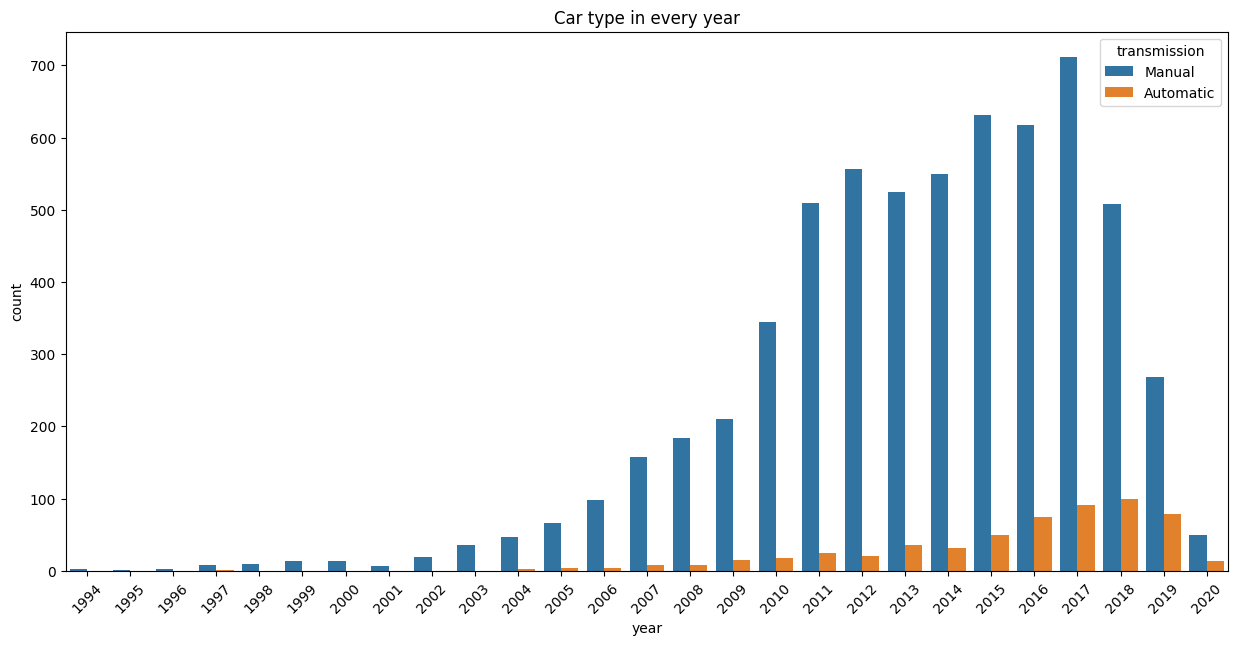

In [21]:
plt.figure(figsize=(15,7))
sn.countplot(data=cc,x='year',hue='transmission')
plt.xticks(rotation=45)
plt.title('Car type in every year')
plt.show()

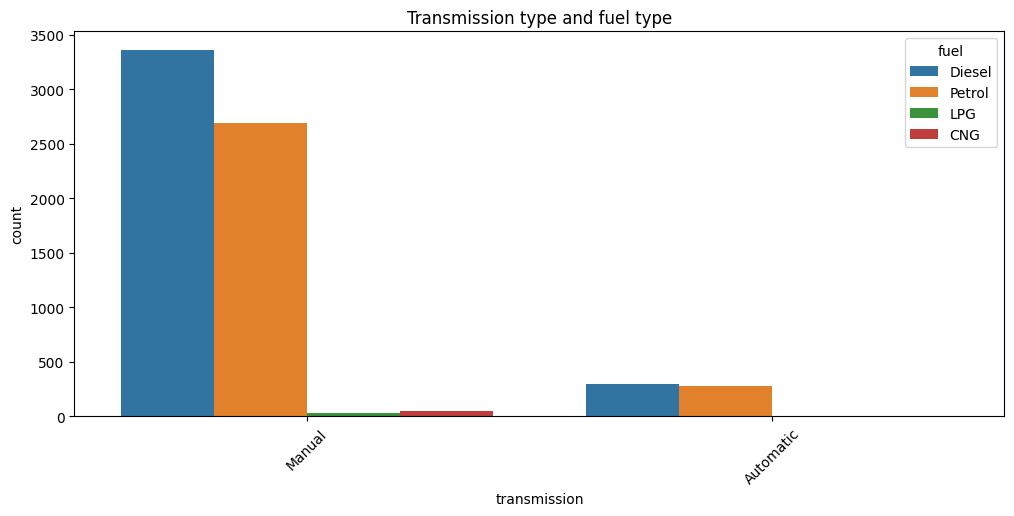

In [22]:
plt.figure(figsize=(12,5))
sn.countplot(data=cc,x='transmission',hue='fuel')
plt.xticks(rotation=45)
plt.title('Transmission type and fuel type')
plt.show()

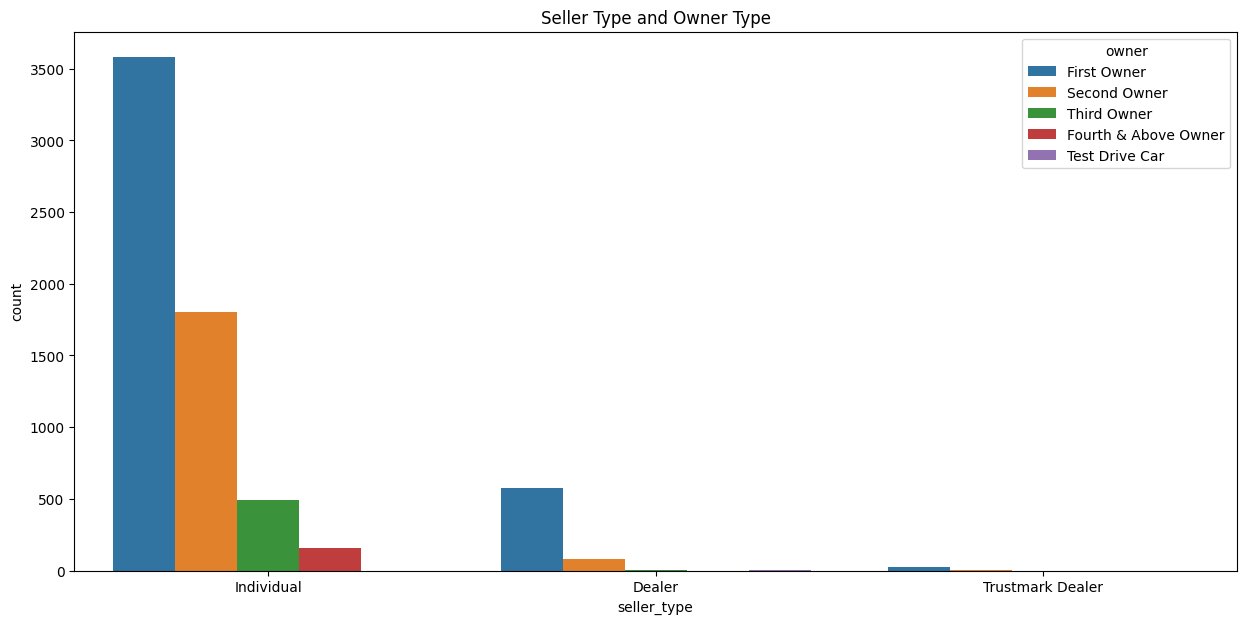

In [23]:
plt.figure(figsize=(15,7))
sn.countplot(data=cc,x='seller_type',hue='owner')
plt.title('Seller Type and Owner Type')
plt.show()

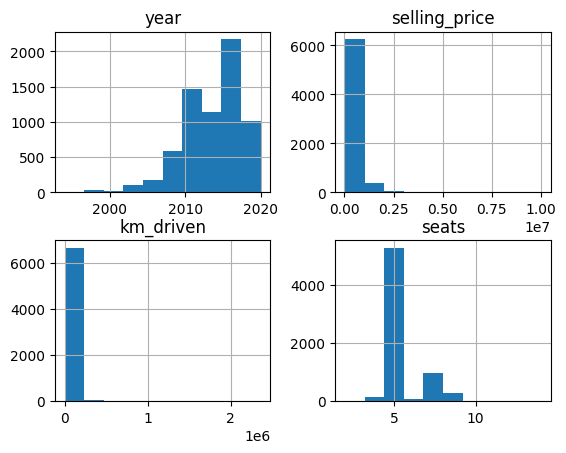

In [24]:
# Distribution check

cc.hist()
plt.show()

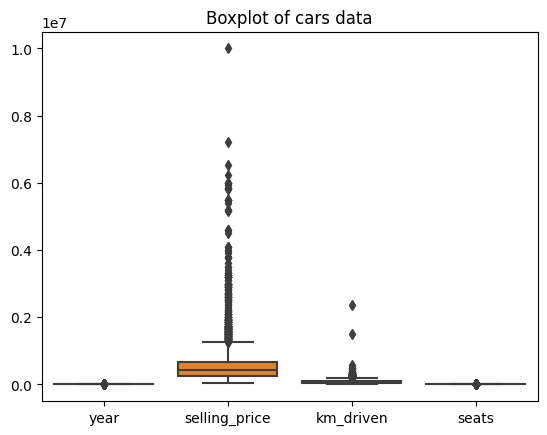

In [25]:
# Outliers check

sn.boxplot(cc)
plt.title('Boxplot of cars data')
plt.show()

In [26]:
# this 10000000 otlier is too long lets find and drop it

print('max_price : ',max(cc['selling_price']))
cc[(cc['selling_price']==10000000)]

max_price :  10000000


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0


In [27]:
# for dropping record using index no.

cc.drop(170,axis=0,inplace=True)

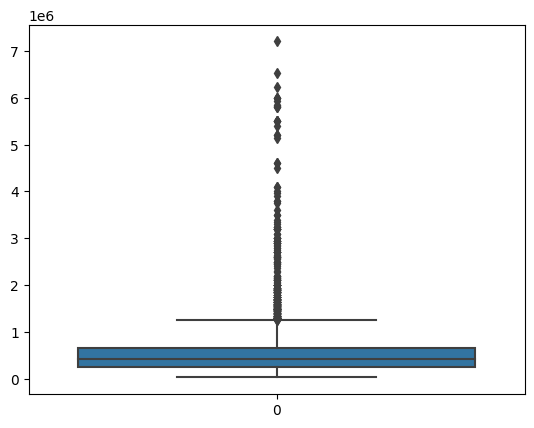

In [28]:
# Now w'll see one outlier is dropped which was too far

sn.boxplot(cc['selling_price'])
plt.show()

In [29]:
cc.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,6716,1981,Maruti Swift Dzire VDI,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6716.0,NaN,NaN,NaN,2013.610631,3.897472,1994.0,2011.0,2014.0,2017.0,2020.0
selling_price,6716.0,NaN,NaN,NaN,524975.393389,510664.662176,29999.0,250000.0,420000.0,650000.0,7200000.0
km_driven,6716.0,NaN,NaN,NaN,73404.799583,58705.256982,1.0,38000.0,68221.5,100000.0,2360457.0
fuel,6716,4,Diesel,3658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,6716,3,Individual,6023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,6716,2,Manual,6142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,6716,5,First Owner,4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,6716,392,18.9 kmpl,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,6716,121,1248 CC,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


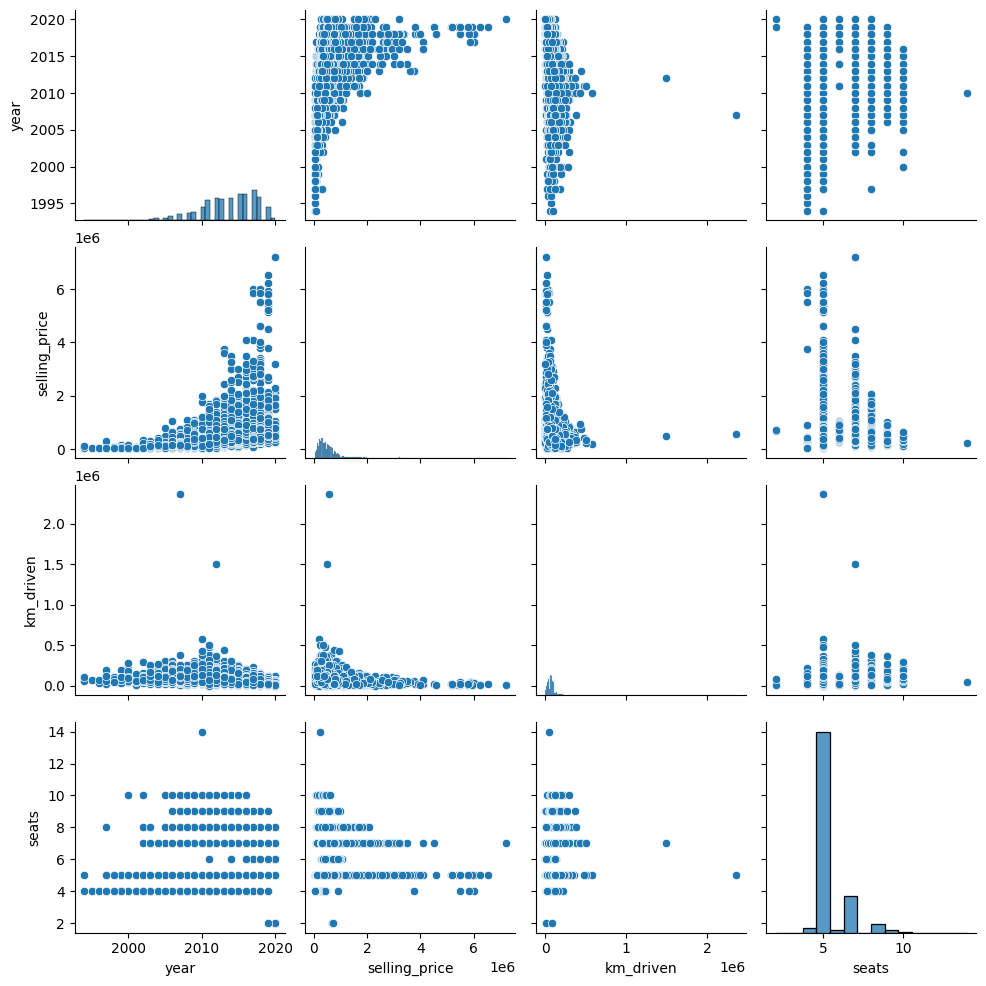

In [30]:
# coorelation between columns

sn.pairplot(cc)
plt.show()

In [31]:
# Separating numerical and categorical columns from dataset

num_cc = cc.select_dtypes(exclude='object')
cat_cc = cc.select_dtypes(include='object')

In [32]:
# After Seperating categorical columns using variable

cat_cc

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm
8122,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"


# **feature Encoding**

**Applying Label Encoder on categorical columns so they will convert in numeric**

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cc:
    cat_cc[col] = le.fit_transform(cat_cc[col])

cat_cc

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,1249,1,1,1,0,335,13,241,178
1,1546,1,1,1,2,284,36,13,260
2,375,3,1,1,4,180,35,250,66
3,743,1,1,1,0,327,24,294,224
4,1290,3,1,1,0,136,14,285,21
...,...,...,...,...,...,...,...,...,...
8121,1350,3,1,1,2,210,119,221,423
8122,735,1,1,1,2,318,24,289,221
8123,733,3,1,1,0,202,10,264,37
8124,618,1,1,1,1,154,32,28,250


In [34]:
# Merging both numeric and categorical

cc_le = pd.concat([cat_cc,num_cc],axis=1)
cc_le

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,year,selling_price,km_driven,seats
0,1249,1,1,1,0,335,13,241,178,2014,450000,145500,5.0
1,1546,1,1,1,2,284,36,13,260,2014,370000,120000,5.0
2,375,3,1,1,4,180,35,250,66,2006,158000,140000,5.0
3,743,1,1,1,0,327,24,294,224,2010,225000,127000,5.0
4,1290,3,1,1,0,136,14,285,21,2007,130000,120000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1350,3,1,1,2,210,119,221,423,2013,260000,50000,5.0
8122,735,1,1,1,2,318,24,289,221,2014,475000,80000,5.0
8123,733,3,1,1,0,202,10,264,37,2013,320000,110000,5.0
8124,618,1,1,1,1,154,32,28,250,2007,135000,119000,5.0


In [35]:
# 3d plotting of dataset values

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(cc_le,x='km_driven',y='selling_price',z='year',color='owner')
fig.show()

In [36]:
fig = go.Figure(go.Surface(z=cc_le.values))
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='3d data overview', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

# **Feature Engineering**

In [37]:
# Adding year old column

cc_le['year_old']=2023-cc_le['year']
cc_le['year_old'].head(4)

0     9
1     9
2    17
3    13
Name: year_old, dtype: int64

In [38]:
# Dropping year and torque colum, no use

cc_le.drop(['torque','year'],axis=1,inplace=True)
cc_le.head(5)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price,km_driven,seats,year_old
0,1249,1,1,1,0,335,13,241,450000,145500,5.0,9
1,1546,1,1,1,2,284,36,13,370000,120000,5.0,9
2,375,3,1,1,4,180,35,250,158000,140000,5.0,17
3,743,1,1,1,0,327,24,294,225000,127000,5.0,13
4,1290,3,1,1,0,136,14,285,130000,120000,5.0,16


**Now seperating feature and target value for model training and testing**

# **Feature and Target split**

In [39]:
# x is our feature after dropping selling price column

x=cc_le.drop('selling_price',axis=1)
x.head(2)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,km_driven,seats,year_old
0,1249,1,1,1,0,335,13,241,145500,5.0,9
1,1546,1,1,1,2,284,36,13,120000,5.0,9


In [40]:
# y is our target variable

y=cc_le['selling_price']
y.head(4)

0    450000
1    370000
2    158000
3    225000
Name: selling_price, dtype: int64

In [41]:
print(x.shape)
y.shape

(6716, 11)


(6716,)

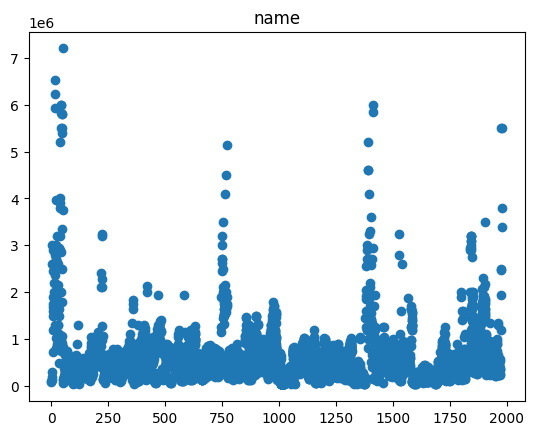

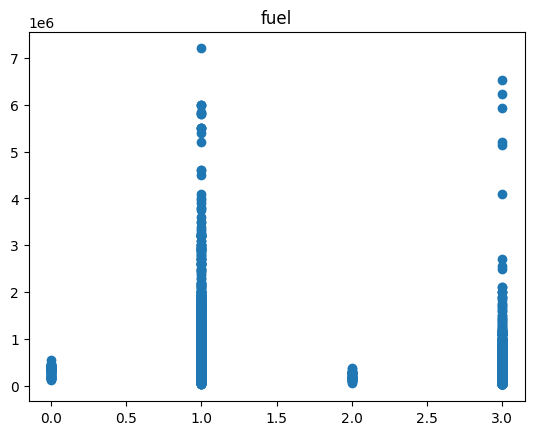

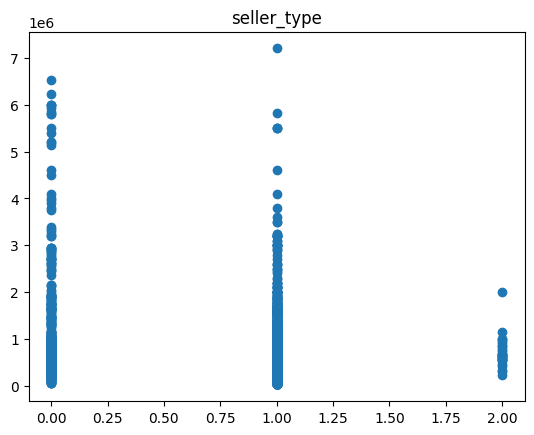

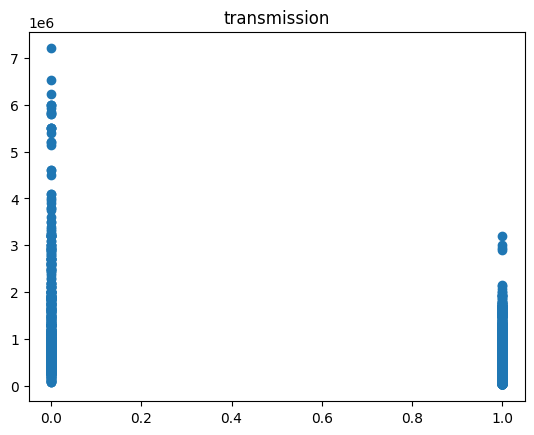

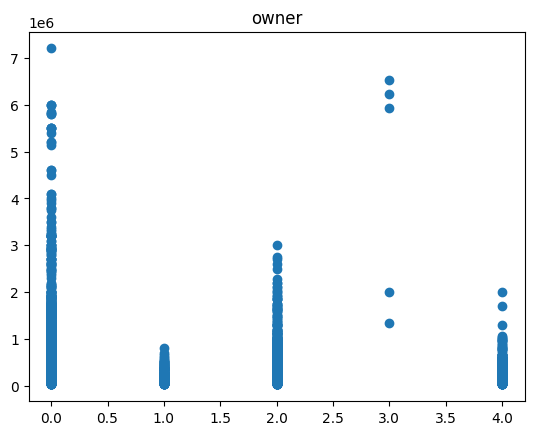

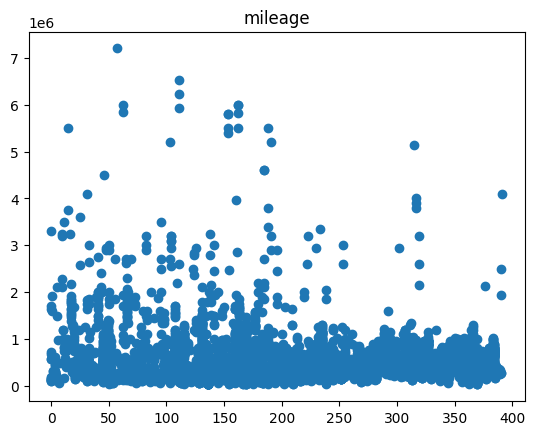

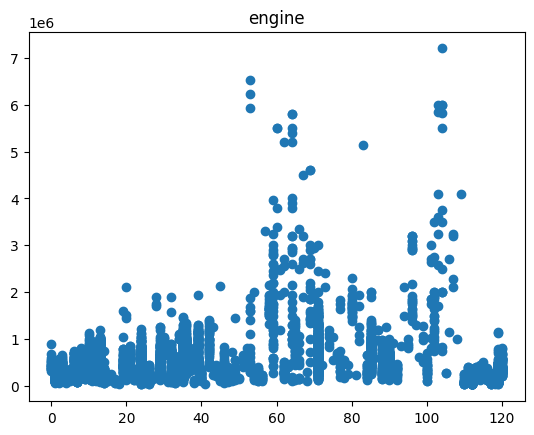

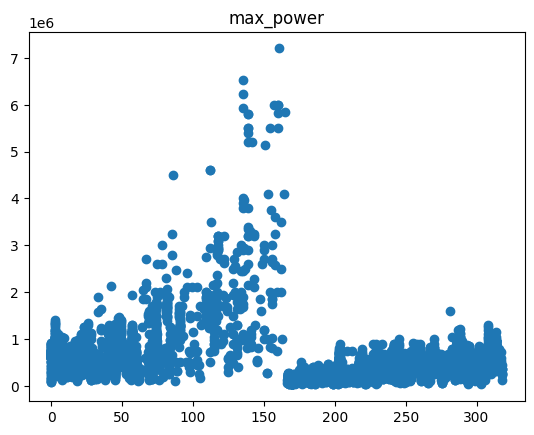

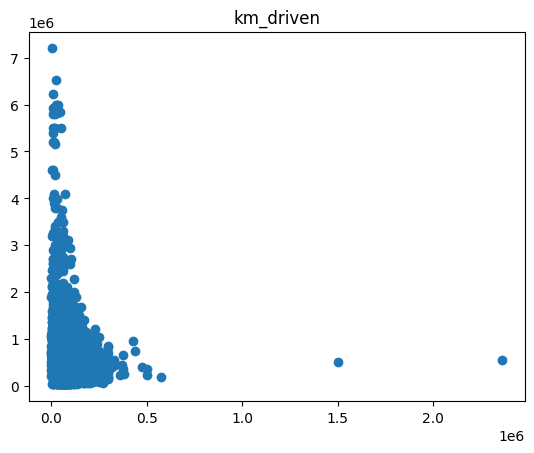

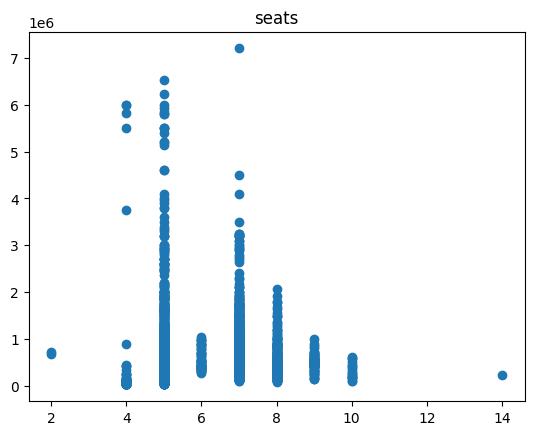

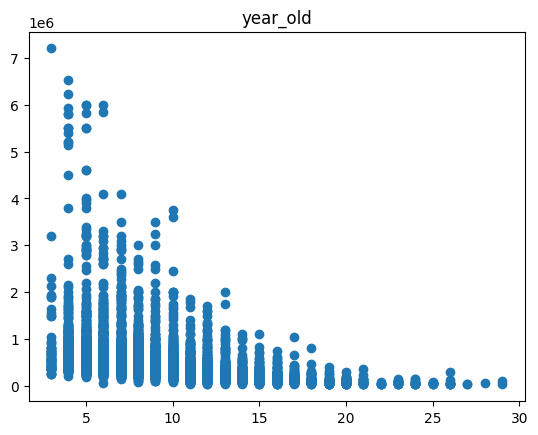

In [42]:
# just checking feature values distribution with target value

for col in x:
    plt.scatter(x[col],y)
    plt.title(f'{col}')
    plt.show()

# **feature importance**

**lets Check which feature from x is more effective for selling_price**

In [43]:
# To check feature importance using library

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()

etr.fit(x,y)
etr.feature_importances_

array([0.05225163, 0.09494843, 0.02025384, 0.21973111, 0.04079485,
       0.03577403, 0.09915891, 0.16259903, 0.0477722 , 0.02638795,
       0.20032801])

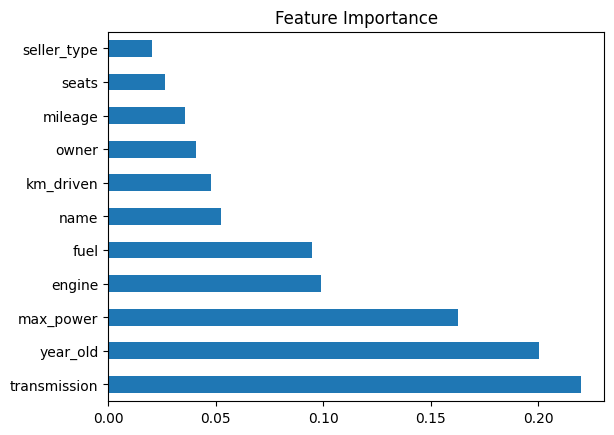

In [44]:
# to learn more about feature importances lets plot it on chart

feat_imp = pd.Series(etr.feature_importances_,index=x.columns)
feat_imp.nlargest(11).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

**It is showing Tranmission column is highly effective on selleing_price
Lets check how**

In [45]:
# Values and its counts in Transmission

cc['transmission'].value_counts()

transmission
Manual       6142
Automatic     574
Name: count, dtype: int64

**lets check price when transmission is Manual and also when Automatic**

In [46]:
cc[(cc['transmission']=='Manual')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [47]:
cc[(cc['transmission']=='Automatic')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
41,Jeep Compass 1.4 Limited Plus BSIV,2019,2100000,5000,Petrol,Individual,Automatic,First Owner,16.0 kmpl,1368 CC,160.77 bhp,250Nm@ 1750-2500rpm,5.0
44,Maruti Swift Dzire VXi AT,2018,675000,23300,Petrol,Dealer,Automatic,First Owner,18.5 kmpl,1197 CC,83.14 bhp,115Nm@ 4000rpm,5.0
49,Mercedes-Benz B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.8 kmpl,2143 CC,120.7 bhp,200Nm@ 1250-4000rpm,5.0
55,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36 kmpl,2755 CC,171.5 bhp,360Nm@ 1200-3400rpm,7.0
57,Audi A6 2.0 TDI Technology,2013,1750000,33900,Diesel,Dealer,Automatic,Second Owner,17.68 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058,Audi A3 40 TFSI Premium,2017,1689999,8000,Petrol,Dealer,Automatic,First Owner,16.6 kmpl,1798 CC,177.5 bhp,250Nm@ 1250-5000rpm,5.0
8063,Hyundai Creta 1.6 SX Automatic,2016,890000,40000,Petrol,Dealer,Automatic,First Owner,14.8 kmpl,1591 CC,121.3 bhp,151NM@ 4850rpm,5.0
8081,Honda City ZXi AT,2005,110000,100000,Petrol,Individual,Automatic,Second Owner,12.0 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0
8086,Maruti Celerio ZXI AMT BSIV,2018,470000,30000,Petrol,Individual,Automatic,First Owner,23.1 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0


**Not getting any clue 
lets try another option**

In [48]:
# 3d plotting for difference in price when car is Manual and Automatic

fig = px.scatter_3d(cc_le,x='km_driven',y='year_old',z='selling_price',color='transmission')
fig.show()

**As we see 3d plotting, So yes Transmission feature is effective on price
Because Manuals have less price but Automatic cars price are Bigger**

# **Model Evaluation**

**Now split into Train and Test for Modeling**

In [49]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=54)

**Scaling our dataset couse having diffrent values with different units**

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [51]:
print('xtrain : ',xtrain.shape)
print('xtest : ',xtest.shape)
print('ytrain : ',ytrain.shape)
print('ytest : ',ytest.shape)

xtrain :  (4701, 11)
xtest :  (2015, 11)
ytrain :  (4701,)
ytest :  (2015,)


**Lets use one by one model with their score and visual represention**

# **Linear Regression**

In [52]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(xtrain,ytrain)
linr_pred = linr.predict(xtest)
linr_score = linr.score(xtest,ytest)*100
print('linear_score : ',linr_score)

linear_score :  48.57808449809635


In [53]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print('mse : ',mean_squared_error(ytest,linr_pred))
print('rmse : ',np.sqrt(mean_squared_error(ytest,linr_pred)))
print('mae : ',mean_absolute_error(ytest,linr_pred))
print('r2_score : ',r2_score(ytest,linr_pred)*100)

mse :  126346852821.85207
rmse :  355453.02477521845
mae :  204374.78483870206
r2_score :  48.57808449809635


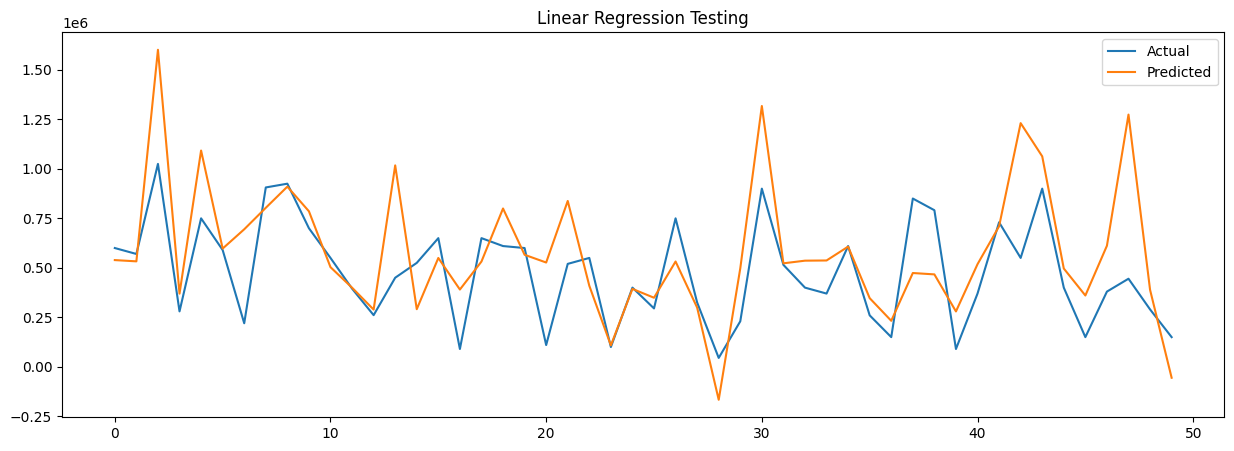

In [54]:
linear_test = pd.DataFrame({'Actual':ytest,'Predicted':linr_pred})
plt.figure(figsize=(15,5))
linear_test = linear_test.reset_index()
linear_test.drop('index',axis=1,inplace=True)
plt.plot(linear_test[:50])
plt.legend(['Actual','Predicted'])
plt.title('Linear Regression Testing')
plt.show()

# **Support Vector Regressor**

In [55]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(xtrain,ytrain)
svr_pred = svr.predict(xtest)
svr_score = svr.score(xtest,ytest)*100
print('svr_score : ',svr_score)

svr_score :  -3.744996277551249


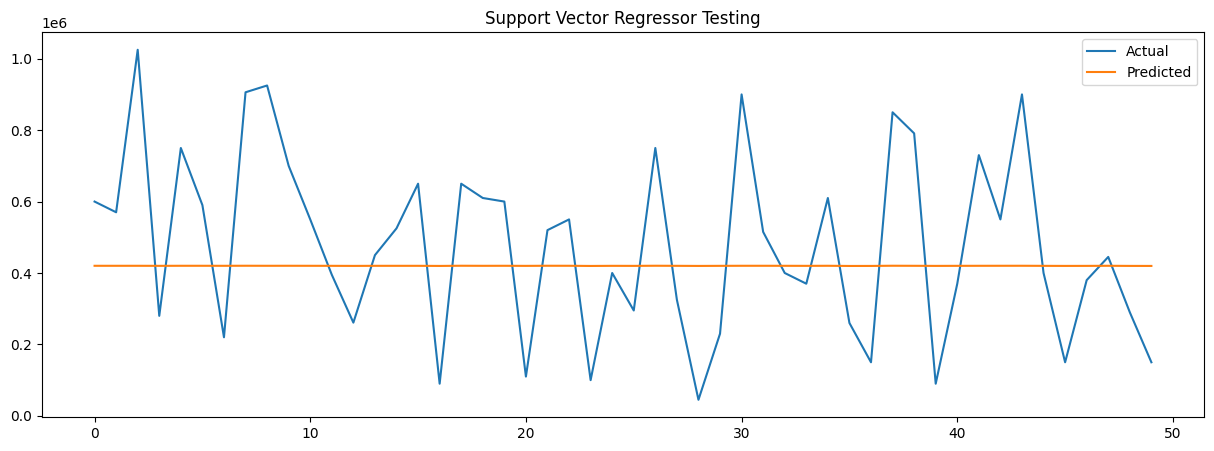

In [56]:
svr_test = pd.DataFrame({'Actual':ytest,'Predicted':svr_pred})
plt.figure(figsize=(15,5))
svr_test = svr_test.reset_index()
svr_test.drop('index',axis=1,inplace=True)
plt.plot(svr_test[:50])
plt.title('Support Vector Regressor Testing')
plt.legend(['Actual','Predicted'])
plt.show()

# **DecisionTree Regressor**

In [57]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
dtr_pred = dtr.predict(xtest)
dtr_score = dtr.score(xtest,ytest)*100
print('dtr_score : ',dtr_score)

dtr_score :  75.2023280570528


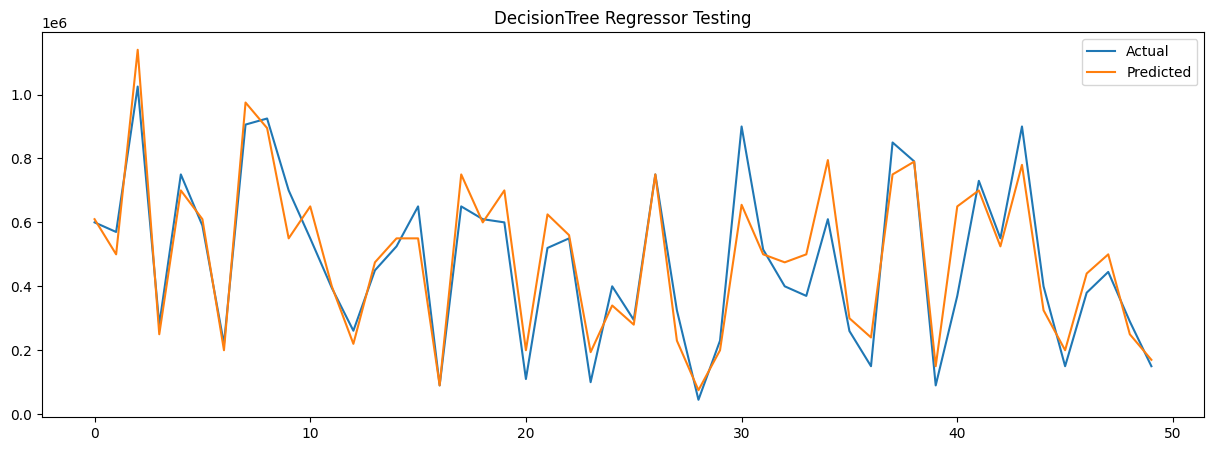

In [58]:
dtr_test = pd.DataFrame({'Actual':ytest,'Predicted':dtr_pred})
plt.figure(figsize=(15,5))
dtr_test = dtr_test.reset_index()
dtr_test.drop('index',axis=1,inplace=True)
plt.plot(dtr_test[:50])
plt.title('DecisionTree Regressor Testing')
plt.legend(['Actual','Predicted'])
plt.show()

# **RandomForest Regressor**

In [59]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(xtrain,ytrain)
rfr_pred = rfr.predict(xtest)
rfr_score = rfr.score(xtest,ytest)*100
print('rfr_score : ',rfr_score)

rfr_score :  91.88951002589664


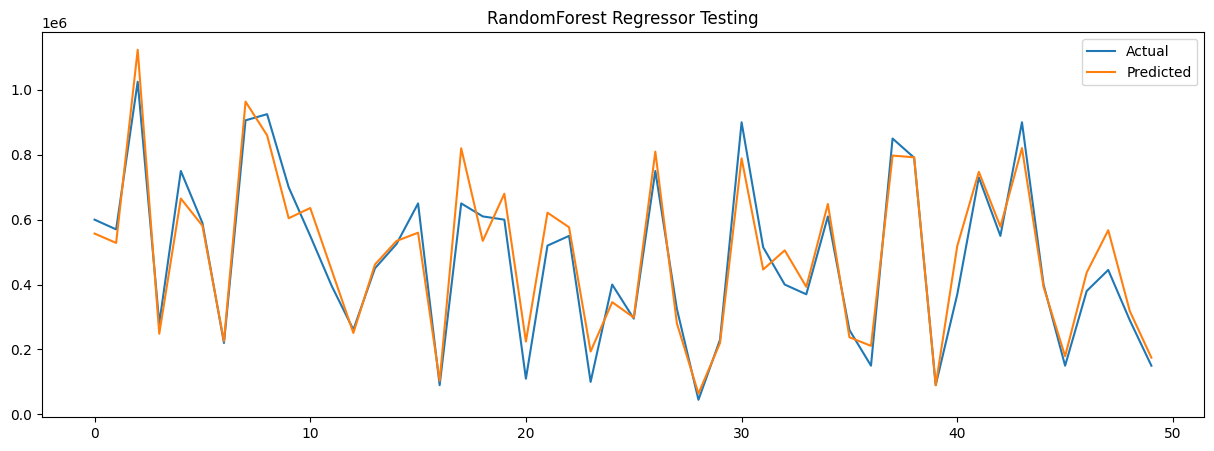

In [60]:
rfr_test = pd.DataFrame({'Actual':ytest,'Predicted':rfr_pred})
plt.figure(figsize=(15,5))
rfr_test = rfr_test.reset_index()
rfr_test.drop('index',axis=1,inplace=True)
plt.plot(rfr_test[:50])
plt.title('RandomForest Regressor Testing')
plt.legend(['Actual','Predicted'])
plt.show()

# **Gradient Boosting**

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(xtrain,ytrain)
gbr_pred = gbr.predict(xtest)
gbr_score = gbr.score(xtest,ytest)*100
print('gbr_score : ',gbr_score)

gbr_score :  89.88467095964995


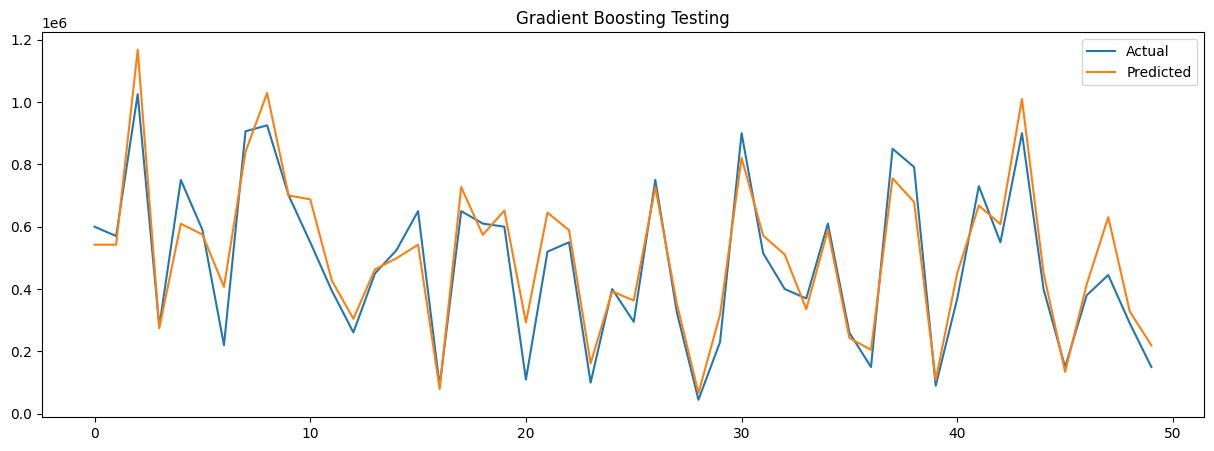

In [62]:
gbr_test = pd.DataFrame({'Actual':ytest,'Predicted':gbr_pred})
plt.figure(figsize=(15,5))
gbr_test = gbr_test.reset_index()
gbr_test.drop('index',axis=1,inplace=True)
plt.plot(gbr_test[:50])
plt.title('Gradient Boosting Testing')
plt.legend(['Actual','Predicted'])
plt.show()

# **KNeighbors Regressor**

In [63]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)
knn_score = knn.score(xtest,ytest)*100
print('knn_score : ',knn_score)

knn_score :  76.36053858848695


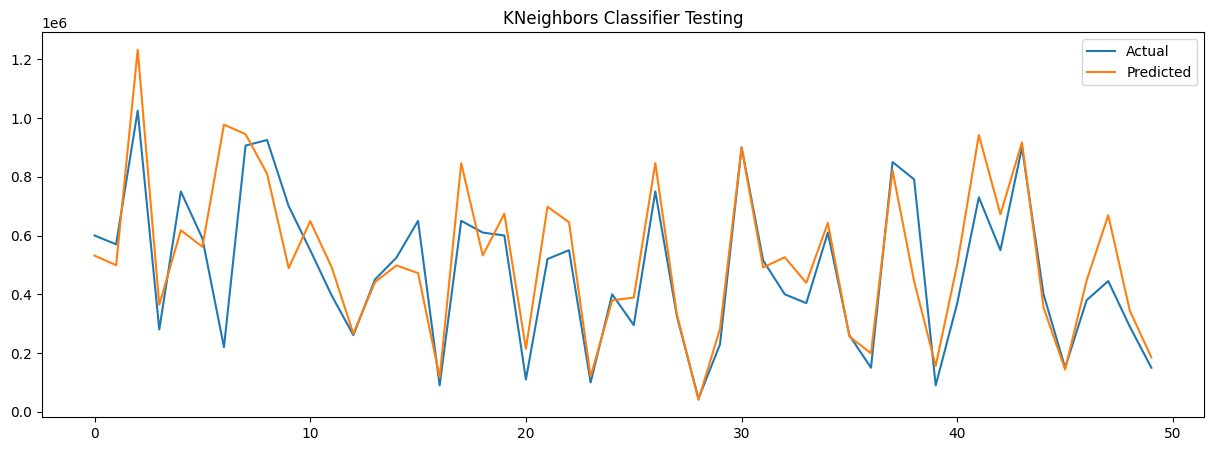

In [64]:
knn_test = pd.DataFrame({'Actual':ytest,'Predicted':knn_pred})
plt.figure(figsize=(15,5))
knn_test = knn_test.reset_index()
knn_test.drop('index',axis=1,inplace=True)
plt.plot(knn_test[:50])
plt.title('KNeighbors Classifier Testing')
plt.legend(['Actual','Predicted'])
plt.show()

# **Models Performance**

In [65]:
# Creating dataframe which includes model name and its score respectively 

Scores = pd.DataFrame({'Model':['Linear Regression','Support Vector Regressor',
                                'DecisionTree Regressor','RandomForest Regressor','GradientBoosting','KNeighbors Regressor'],
                       'Accuracy_Score':[linr_score,svr_score,dtr_score,rfr_score,gbr_score,knn_score]})
Scores

,Model,Accuracy_Score
0,Linear Regression,48.578084
1,Support Vector Regressor,-3.744996
2,DecisionTree Regressor,75.202328
3,RandomForest Regressor,91.889510
4,GradientBoosting,89.884671
5,KNeighbors Regressor,76.360539


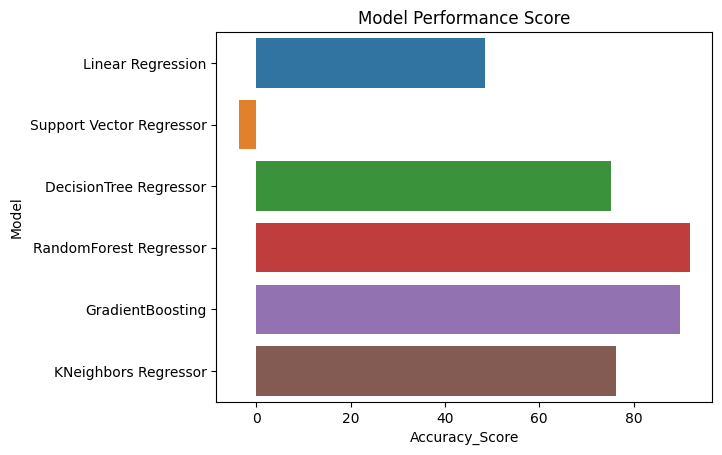

In [66]:
# Visual Representation of Models and their Scores

sn.barplot(data=Scores,x='Accuracy_Score',y='Model')
plt.title('Model Performance Score')
plt.show()

* Below 70% means the model performance is poor, probably underfitting case 
* Above 70% - 80% means the model performance is good
* Above 80% - 90% means the model performance is excellent
* Above 95% means the model is probably overfitted in Regression Term *